<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library for NFL Data
!pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=e1d73dea427961c1e202ed90dc9b82b621c77945e0b7a6c8e5214d9598cf55e7
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

import nfl_data_py as nfl

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)
stats.head()

In [33]:
run_stats = stats.groupby(["posteam", "run_gap", "run_location"]).size().reset_index(name = "run_count")
run_stats.head()

,posteam,run_gap,run_location,run_count
0,ARI,end,left,26
1,ARI,end,right,32
2,ARI,guard,left,8
3,ARI,guard,right,7
4,ARI,tackle,left,26


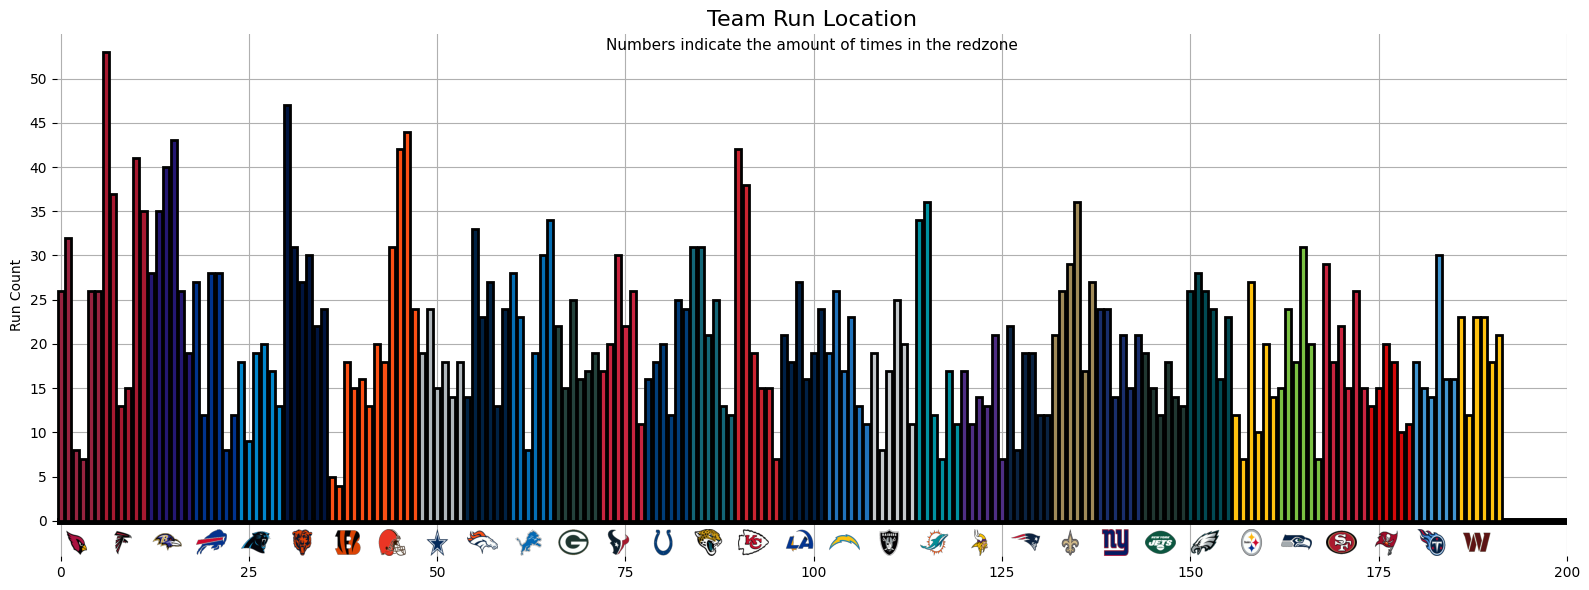

In [50]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in run_stats["posteam"]]

logo_images = []

for team in run_stats["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(run_stats.index, run_stats["run_count"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add logo
for i in range(len(run_stats["posteam"])):
    if ((i % 6 == 0)):
      logo_img = logo_images[i]
      plt.imshow(logo_img, extent=[i,i + 4, -4 , -1], aspect='auto', zorder=7)


ax.set_ylabel('Run Count')

# Add a main title
ax.set_title('Team Run Location', fontsize=16)

# Add subtitle
subtitle = 'Numbers indicate the amount of times in the redzone'
plt.text(0.5, 0.97, subtitle, fontsize=11, ha='center', transform=ax.transAxes)


plt.ylim(-4,55)
plt.xlim([-0.5, 200])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.xticks([])
plt.yticks(np.arange(0,55, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

Team: LAC


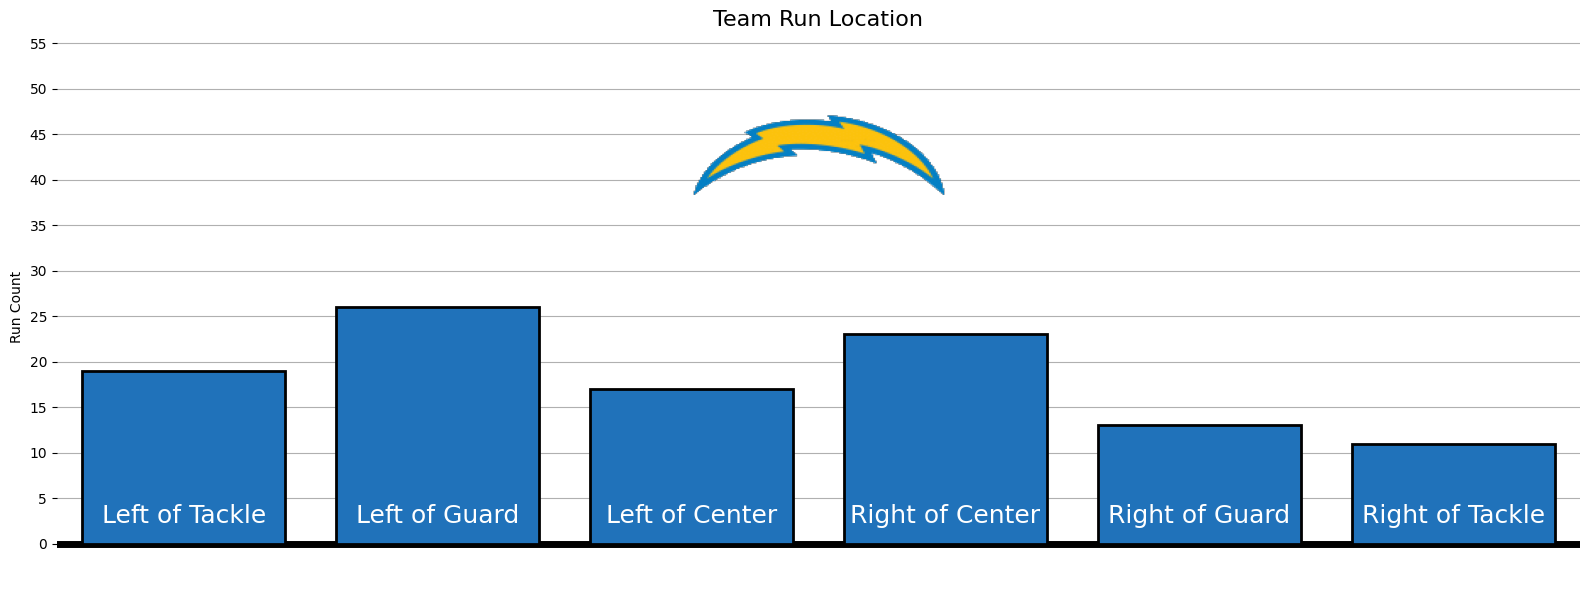

In [65]:
tm = input("Team: ")

tm_run_stats = run_stats[run_stats["posteam"] == tm].reset_index()

teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_color = teamcolor.get(tm)

logo_images = []

for team in tm_run_stats["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(tm_run_stats.index, tm_run_stats["run_count"], width=0.8, color=tm_color, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add logo
logo_img = logo_images[i]
plt.imshow(logo_img, extent=[2,3, 35 , 50], aspect='auto', zorder=7)

categories = ["Left of Tackle", "Left of Guard", "Left of Center", "Right of Center","Right of Guard","Right of Tackle"]
for i in range(6):
  plt.text(i, 3, categories[i], ha='center', va='center', color='w', fontsize=18, zorder = 10)

ax.set_ylabel('Run Count')

# Add a main title
ax.set_title('Team Run Location', fontsize=16)


plt.ylim(-4,56)
plt.xlim([-0.5, 5.5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,56, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()